In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv
/kaggle/input/e-commerce-shoppers-behaviour-understanding/sample.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pprint import pprint
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, LabelEncoder, OrdinalEncoder

from sklearn.feature_selection import RFECV, SelectPercentile, SelectKBest, SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector, mutual_info_classif, chi2

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

from imblearn.over_sampling import RandomOverSampler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier, Perceptron
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, f1_score, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [3]:
train_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/train_data_v2.csv')
test_data = pd.read_csv('/kaggle/input/e-commerce-shoppers-behaviour-understanding/test_data_v2.csv')
train_data.shape, test_data.shape

((14731, 22), (6599, 21))

In [4]:
train_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [5]:
test_data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [6]:
target = train_data['Made_Purchase']
train = train_data.iloc[:,:-1]
test = test_data.copy()

train.shape, target.shape, test.shape

((14731, 21), (14731,), (6599, 21))

In [7]:
train.rename(columns={'GoogleMetric:Bounce Rates':'GoogleMetric_Bounce_Rates',
                      'GoogleMetric:Exit Rates':'GoogleMetric_Exit_Rates',
                      'GoogleMetric:Page Values':'GoogleMetric_Page_Values',
                      'Type of Traffic':'Type_of_Traffic',
                      'Cookies Setting':'Cookies_Setting',
                      'Marital Status':'Marital_Status'}, inplace=True)

test.rename(columns={'GoogleMetric:Bounce Rates':'GoogleMetric_Bounce_Rates',
                      'GoogleMetric:Exit Rates':'GoogleMetric_Exit_Rates',
                      'GoogleMetric:Page Values':'GoogleMetric_Page_Values',
                      'Type of Traffic':'Type_of_Traffic',
                      'Cookies Setting':'Cookies_Setting',
                      'Marital Status':'Marital_Status'}, inplace=True)

In [8]:
print('Train info')
print(train.info())
print('--------------------------------------------------------------------')
print('Test info')
print(test.info())

Train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric_Bounce_Rates        14580 non-null  float64
 7   GoogleMetric_Exit_Rates          14602 non-null  float64
 8   GoogleMetric_Page_Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchE

In [9]:
num_features = train.select_dtypes('float64').columns.tolist()
# num_cat = ['HomePage', 'LandingPage', 'ProductDescriptionPage', 'OS', 'SearchEngine', 'Zone', 
#            'Type_of_Traffic', 'WeekendPurchase']
# num_features = [x for x in num_features if x not in num_cat]
cat_features = train.select_dtypes('object').columns.tolist()

# num_features = ['HomePage', 'LandingPage', 'ProductDescriptionPage', 'HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration', 
#                 'GoogleMetric_Bounce_Rates', 'GoogleMetric_Exit_Rates', 'GoogleMetric_Page_Values']

# bool_features = ['SeasonalPurchase','WeekendPurchase']

# cat_features = ['Month_SeasonalPurchase', 'OS', 
#                 'SearchEngine', 'Zone', 'Type_of_Traffic', 'CustomerType', 'Gender', 'Cookies_Setting', 
#                 'Education', 'Marital_Status']

print('Numerical features\n', num_features, '\nLength - ', len(num_features))
# print('Boolean features\n', bool_features, '\nLength - ', len(bool_features))
print('Categorical features\n', cat_features, '\nLength - ', len(cat_features))

Numerical features
 ['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric_Bounce_Rates', 'GoogleMetric_Exit_Rates', 'GoogleMetric_Page_Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type_of_Traffic', 'WeekendPurchase'] 
Length -  15
Categorical features
 ['Month_SeasonalPurchase', 'CustomerType', 'Gender', 'Cookies_Setting', 'Education', 'Marital_Status'] 
Length -  6


In [10]:
# train[cat_features] = train[cat_features].astype('category')
# test[cat_features] = test[cat_features].astype('category')

In [11]:
# print('Train info')
# print(train.info())
# print('--------------------------------------------------------------------')
# print('Test info')
# print(test.info())

In [12]:
print('Train Null values')
print(train.isnull().sum())
print('--------------------------------------------')
print('Test Null values')
print(test.isnull().sum())

Train Null values
HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric_Bounce_Rates          151
GoogleMetric_Exit_Rates            129
GoogleMetric_Page_Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type_of_Traffic                    143
CustomerType                       144
Gender                             145
Cookies_Setting                    144
Education                          136
Marital_Status                     130
WeekendPurchase                    121
dtype: int64
--------------------------------------------
Test Null values
HomePage                           51
HomePage_Duration                  55
LandingPage 

# EDA

<AxesSubplot:xlabel='Made_Purchase', ylabel='count'>

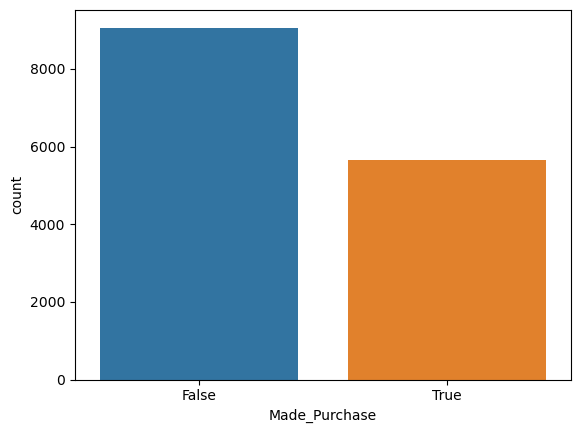

In [13]:
sns.countplot(x = 'Made_Purchase',data = train_data)

<AxesSubplot:xlabel='CustomerType', ylabel='count'>

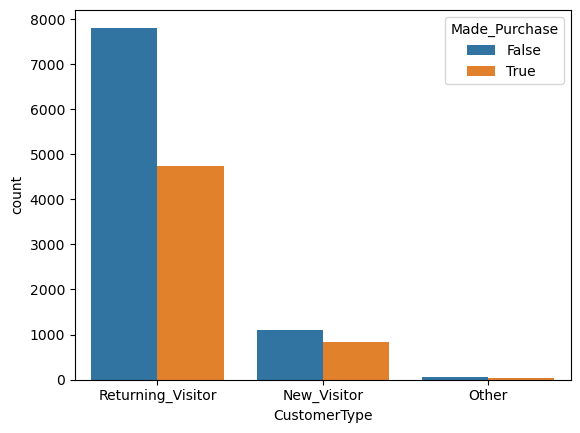

In [14]:
sns.countplot(x = 'CustomerType',hue = 'Made_Purchase',data = train_data)

<AxesSubplot:xlabel='Month_SeasonalPurchase', ylabel='count'>

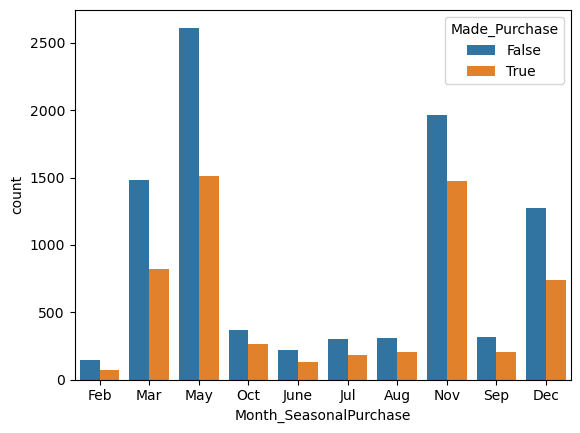

In [15]:
sns.countplot(x = 'Month_SeasonalPurchase',hue = 'Made_Purchase',data = train_data)

<AxesSubplot:xlabel='SeasonalPurchase', ylabel='count'>

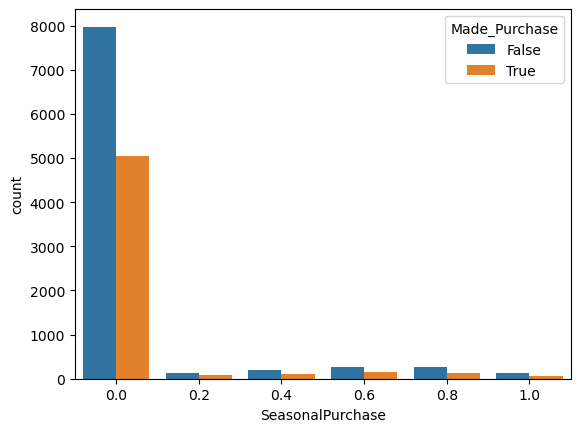

In [16]:
sns.countplot(x = 'SeasonalPurchase',hue = 'Made_Purchase',data = train_data)

<AxesSubplot:xlabel='Month_SeasonalPurchase', ylabel='count'>

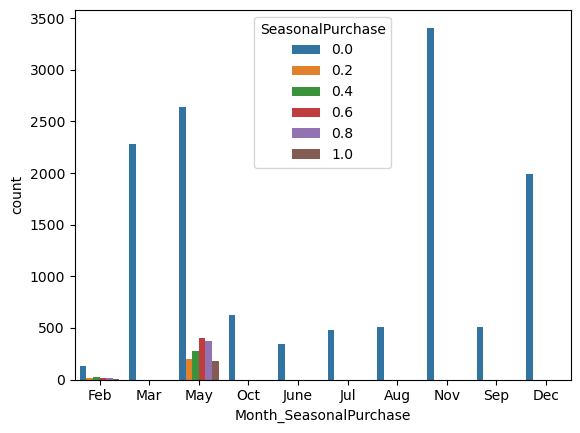

In [17]:
sns.countplot(x = 'Month_SeasonalPurchase',hue = 'SeasonalPurchase',data = train_data)

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric_Bounce_Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric_Exit_Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric_Page_Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


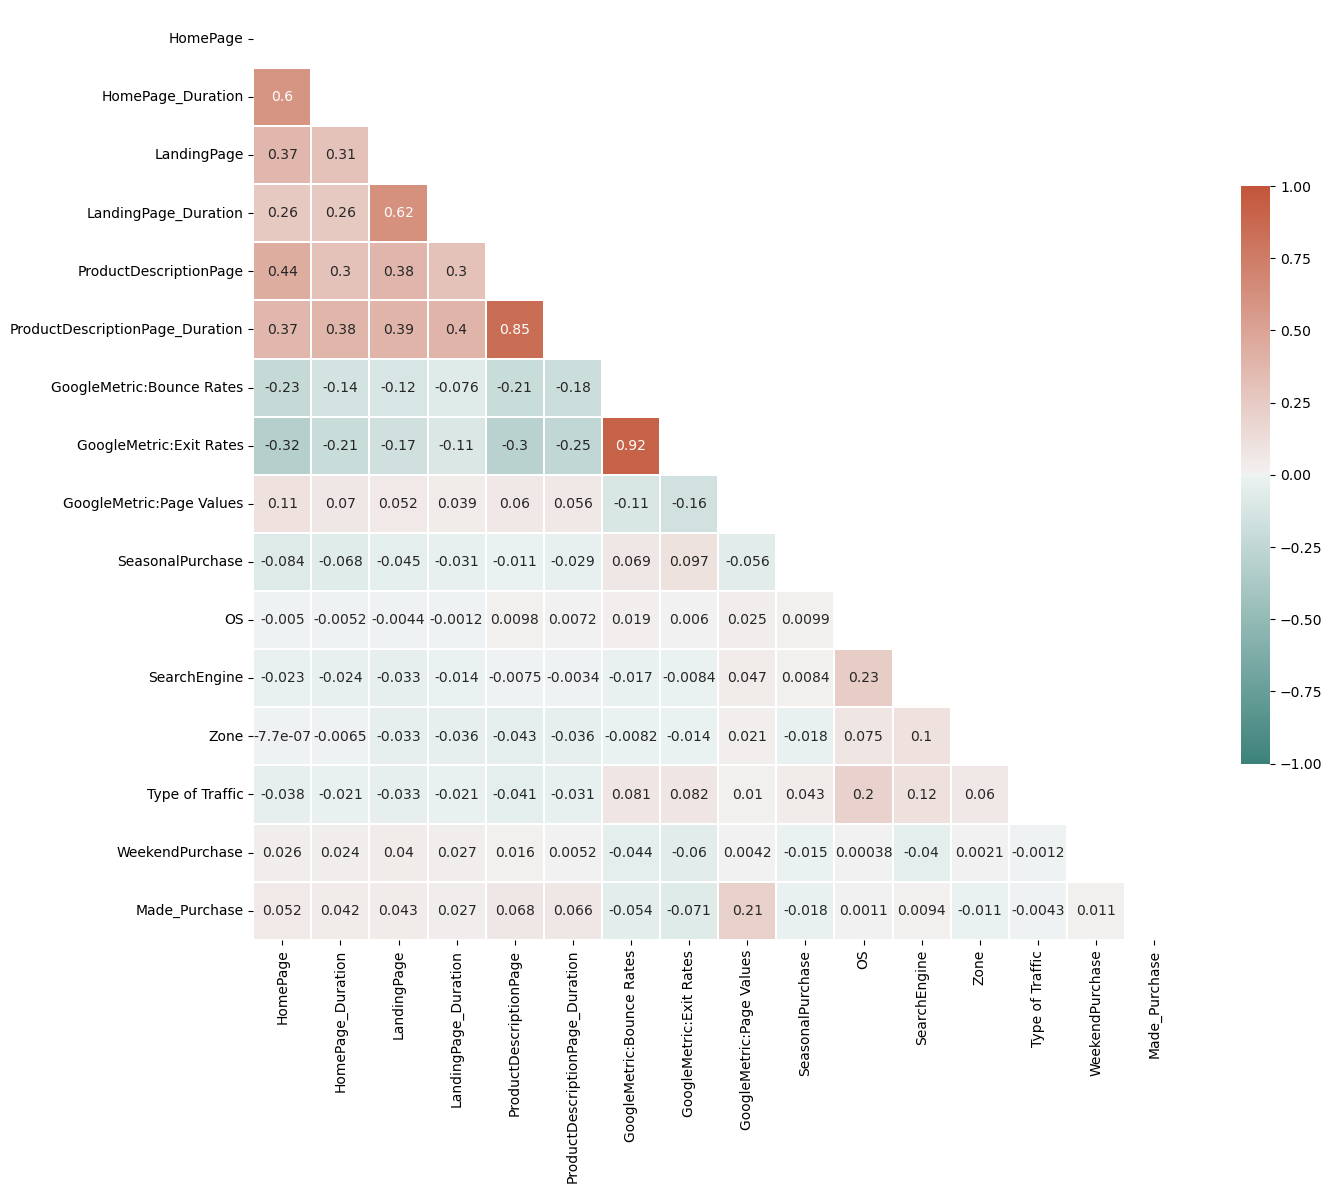

In [19]:
correlation = train_data.corr()

mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

cmap = sns.diverging_palette(180, 20, as_cmap=True)
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=.2, cbar_kws={"shrink": .5}, annot=True)

plt.show()

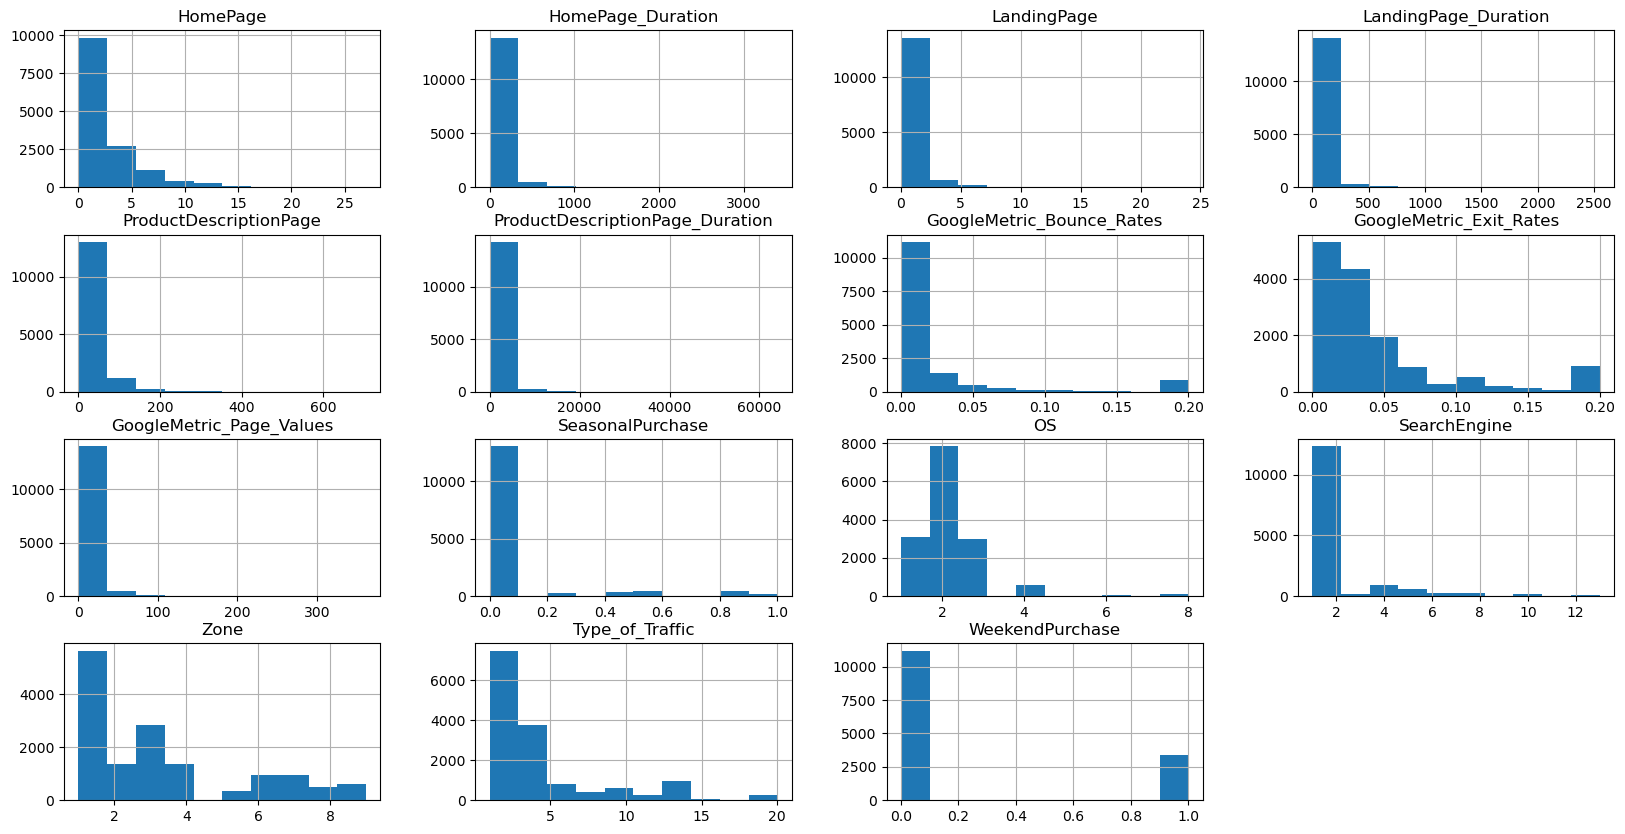

In [20]:
train.hist(figsize=(20,10));

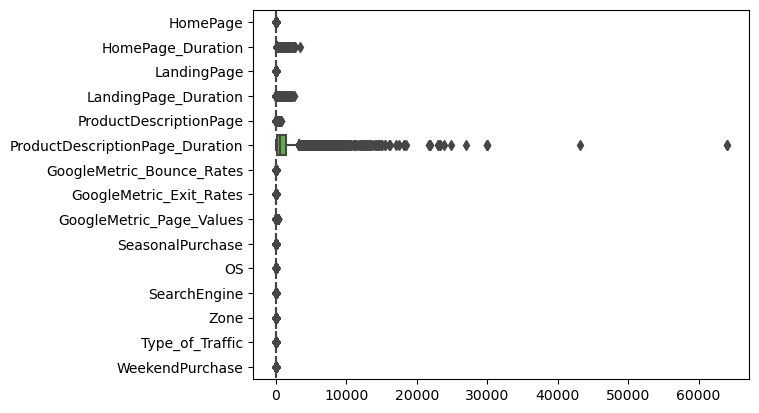

In [21]:
ax = sns.boxplot(data=train,orient='h')

# Handling Null values

In [22]:
# train.loc[(train['HomePage'] == 0) & (train['HomePage_Duration'] != 0), 'HomePage_Duration'] = 0
# train.loc[(train['HomePage'] != 0) & (train['HomePage_Duration'] == 0), 'HomePage'] = 0

# train.loc[(train['LandingPage'] == 0) & (train['LandingPage_Duration'] != 0), 'LandingPage_Duration'] = 0
# train.loc[(train['LandingPage'] != 0) & (train['LandingPage_Duration'] == 0), 'LandingPage'] = 0

# train.loc[(train['ProductDescriptionPage'] == 0) & (train['ProductDescriptionPage_Duration'] != 0), 'ProductDescriptionPage_Duration'] = 0
# train.loc[(train['ProductDescriptionPage'] != 0) & (train['ProductDescriptionPage_Duration'] == 0), 'ProductDescriptionPage'] = 0

In [23]:
# columns1 = ['HomePage', 'LandingPage', 'ProductDescriptionPage','SeasonalPurchase']
# columns2 = ['HomePage_Duration', 'LandingPage_Duration', 'ProductDescriptionPage_Duration',
#             'GoogleMetric_Bounce_Rates','GoogleMetric_Exit_Rates','GoogleMetric_Page_Values']

# # for col in columns1+columns2:
# #     train[col].replace(0,np.nan, inplace=True)
# #     test[col].replace(0,np.nan, inplace=True)

# train[columns1] = train[columns1].fillna(train[columns1].median())
# train[columns2] = train[columns2].fillna(train[columns2].mean())
# train = train.fillna(train.mode().iloc[0])

# test[columns1] = test[columns1].fillna(train[columns1].median())
# test[columns2] = test[columns2].fillna(train[columns2].mean())
# test = test.fillna(train.mode().iloc[0])

In [24]:
# train.isnull().sum(), test.isnull().sum()

# Handling Outliers

In [25]:
# plt.figure(figsize = (15, 10))
# plt.style.use('seaborn-white')
# ax=plt.subplot(331)
# plt.boxplot(train['HomePage'])
# ax.set_title('HomePage')
# ax=plt.subplot(332)
# plt.boxplot(train['HomePage_Duration'])
# ax.set_title('HomePage_Duration')
# ax=plt.subplot(333)
# plt.boxplot(train['LandingPage'])
# ax.set_title('LandingPage')
# ax=plt.subplot(334)
# plt.boxplot(train['LandingPage_Duration'])
# ax.set_title('LandingPage_Duration')
# ax=plt.subplot(335)
# plt.boxplot(train['ProductDescriptionPage'])
# ax.set_title('ProductDescriptionPage')
# ax=plt.subplot(336)
# plt.boxplot(train['ProductDescriptionPage_Duration'])
# ax.set_title('ProductDescriptionPage_Duration')
# ax=plt.subplot(337)
# plt.boxplot(train['GoogleMetric_Bounce_Rates'])
# ax.set_title('BounceRates')
# ax=plt.subplot(338)
# plt.boxplot(train['GoogleMetric_Exit_Rates'])
# ax.set_title('ExitRates')
# ax=plt.subplot(339)
# plt.boxplot(train['GoogleMetric_Page_Values'])
# ax.set_title('PageValues')

In [26]:
# out_features=['HomePage','HomePage_Duration','LandingPage','LandingPage_Duration',
#               'ProductDescriptionPage','ProductDescriptionPage_Duration','GoogleMetric_Bounce_Rates',
#               'GoogleMetric_Exit_Rates']

# def outliers(X,y, threshold=1.5):
#     for col in out_features:
#         Q1 = X[col].quantile(0.25)
#         Q3 = X[col].quantile(0.75)
#         IQR = Q3 - Q1

#         filter = (X[col] >= Q1 - threshold * IQR) & (X[col] <= Q3 + threshold *IQR)
#         train_out=X.loc[filter]
#         target_out = y.loc[filter]
#     return train_out, target_out

In [27]:
# train_out, target_out = outliers(train,target, 0.5)
# train_out.shape, target_out.shape

In [28]:
# plt.figure(figsize = (15, 10))
# plt.style.use('seaborn-white')
# ax=plt.subplot(331)
# plt.boxplot(train_out['HomePage'])
# ax.set_title('HomePage')
# ax=plt.subplot(332)
# plt.boxplot(train_out['HomePage_Duration'])
# ax.set_title('HomePage_Duration')
# ax=plt.subplot(333)
# plt.boxplot(train_out['LandingPage'])
# ax.set_title('LandingPage')
# ax=plt.subplot(334)
# plt.boxplot(train_out['LandingPage_Duration'])
# ax.set_title('LandingPage_Duration')
# ax=plt.subplot(335)
# plt.boxplot(train_out['ProductDescriptionPage'])
# ax.set_title('ProductDescriptionPage')
# ax=plt.subplot(336)
# plt.boxplot(train_out['ProductDescriptionPage_Duration'])
# ax.set_title('ProductDescriptionPage_Duration')
# ax=plt.subplot(337)
# plt.boxplot(train_out['GoogleMetric_Bounce_Rates'])
# ax.set_title('BounceRates')
# ax=plt.subplot(338)
# plt.boxplot(train_out['GoogleMetric_Exit_Rates'])
# ax.set_title('ExitRates')
# ax=plt.subplot(339)
# plt.boxplot(train_out['GoogleMetric_Page_Values'])
# ax.set_title('PageValues')

In [29]:
# train_num_imp = train[num_features].fillna(train[num_features].median())
# train_num_imp.isnull().sum()

In [30]:
# def outliers(threshold, col):
#     q25, q75 = np.percentile(col, 25) , np.percentile(col, 75)
#     iqr = q75- q25
#     cutoff = iqr*threshold
#     lower = q25-cutoff
#     upper = q75+cutoff
#     outliers = [x for x in col if x>=lower and x<=upper]
#     print(f'no of outliers in {col.name} are', len(outliers))

In [31]:
# for col in train_num_imp.columns:
#   outliers(0.5, train_num_imp[col])

In [32]:
# train_num_outlier =train_num_imp[(abs(stats.zscore(train_num_imp)) < 3).all(axis=1)] #calculates mean and std dev for each col.... then it retains all the rows which satisfy that criteria
# print("no of outlier rows removed ",len(train_num_imp)- len(train_num_outlier))

In [33]:
# train_num_outlier.shape

In [34]:
# train_out = train.iloc[train_num_outlier.index.values]
# target_out = target.iloc[train_num_outlier.index.values]

In [35]:
# ax = sns.boxplot(data=train_out,orient='h')

# Scaling

In [36]:
# log = FunctionTransformer(lambda x: np.log(x+1))
# pt = PowerTransformer()
# ss = StandardScaler()

# train_out[num_features] = pt.fit_transform(train_out[num_features])
# test[num_features] = pt.transform(test[num_features])
# train_out[num_features] = ss.fit_transform(train_out[num_features])
# test[num_features] = ss.transform(test[num_features])

# train_out.shape, test.shape

# Encoding

In [37]:
# le = LabelEncoder()
# ohe = OneHotEncoder()

# # for col in columns3:
# #     train_out[col] = le.fit_transform(train_out[col])
# #     test[col] = le.transform(test[col])
# # train_out.shape, test.shape

# # train_enc = ohe.fit_transform(train_out)
# # test_enc = ohe.transform(test)
# # train_enc.shape, test_enc.shape

# train_enc = pd.get_dummies(train_out)
# test_enc = pd.get_dummies(test)
# train_enc.shape, test_enc.shape

# Converting DTypes

In [38]:
# train_enc.loc[train_enc['SeasonalPurchase'] > 0.4, 'SeasonalPurchase'] = 1
# train_enc.loc[train_enc['SeasonalPurchase'] <= 0.4, 'SeasonalPurchase'] = 0
# print(train_enc['SeasonalPurchase'].value_counts())

# test_enc.loc[test_enc['SeasonalPurchase'] > 0.4, 'SeasonalPurchase'] = 1
# test_enc.loc[test_enc['SeasonalPurchase'] <= 0.4, 'SeasonalPurchase'] = 0
# print(test_enc['SeasonalPurchase'].value_counts())

In [39]:
# columns3 = ['OS', 'SearchEngine', 'Zone', 'Type_of_Traffic']

# train_enc[columns3] = train_enc[columns3].astype('category')
# train_enc[bool_features] = train_enc[bool_features].astype('bool')
# print(train_enc['SeasonalPurchase'].value_counts())

# test_enc[columns3] = test_enc[columns3].astype('category')
# test_enc[bool_features] = test_enc[bool_features].astype('bool')
# print(test_enc['SeasonalPurchase'].value_counts())

In [40]:
# train_enc.info(), test_enc.info()

# SMOTE

In [41]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# train_sm, target_sm = sm.fit_resample(train_enc,target_out)

# train_sm = train_sm.fillna(train_sm.mode().iloc[0])

# train_sm.shape, target_sm.shape

# Preprocessing

In [42]:
simn = SimpleImputer(strategy='mean')
simd = SimpleImputer(strategy='median')
simf = SimpleImputer(strategy='most_frequent')
knn = KNNImputer(n_neighbors=2)

log = FunctionTransformer(lambda x: np.log(x+1))
pt = PowerTransformer()
ss = StandardScaler()
mms = MinMaxScaler()

ohe = OneHotEncoder()
le = LabelEncoder()
oe = OrdinalEncoder()

ros = RandomOverSampler()

In [43]:
num_trans = Pipeline(steps=[('imputer',knn),('pt',pt),('scaler',ss)])
cat_trans = Pipeline(steps=[('imputer',simf),('encoder',ohe)])
ct = ColumnTransformer(transformers=[('num_trans',num_trans,num_features),
                                     ('cat_trans',cat_trans,cat_features)])

In [44]:
# # Preprocessing

# train_out = ct.fit_transform(train_out)
# test_out = ct.transform(test)

train_pp = ct.fit_transform(train)
test_pp = ct.transform(test)

# train_ros, target_ros = ros.fit_resample(train_out, target_out)

# train_out.shape, test_out.shape, train_pp.shape, test_pp.shape, train_ros.shape, target_ros.shape

In [45]:
# Get the transformed feature names from the numerical pipeline
num_pipeline = ct.named_transformers_['num_trans']
num_feature_names = num_pipeline.named_steps['scaler'].get_feature_names_out(num_features)

# Get the transformed feature names from the categorical pipeline
cat_pipeline = ct.named_transformers_['cat_trans']
cat_feature_names = cat_pipeline.named_steps['encoder'].get_feature_names_out(cat_features)

# Concatenate the lists of feature names to get the final list
feature_names = num_feature_names.tolist() + cat_feature_names.tolist()

print(feature_names)

['HomePage', 'HomePage_Duration', 'LandingPage', 'LandingPage_Duration', 'ProductDescriptionPage', 'ProductDescriptionPage_Duration', 'GoogleMetric_Bounce_Rates', 'GoogleMetric_Exit_Rates', 'GoogleMetric_Page_Values', 'SeasonalPurchase', 'OS', 'SearchEngine', 'Zone', 'Type_of_Traffic', 'WeekendPurchase', 'Month_SeasonalPurchase_Aug', 'Month_SeasonalPurchase_Dec', 'Month_SeasonalPurchase_Feb', 'Month_SeasonalPurchase_Jul', 'Month_SeasonalPurchase_June', 'Month_SeasonalPurchase_Mar', 'Month_SeasonalPurchase_May', 'Month_SeasonalPurchase_Nov', 'Month_SeasonalPurchase_Oct', 'Month_SeasonalPurchase_Sep', 'CustomerType_New_Visitor', 'CustomerType_Other', 'CustomerType_Returning_Visitor', 'Gender_Female', 'Gender_Male', 'Gender_Not Specified', 'Cookies_Setting_ALL', 'Cookies_Setting_Deny', 'Cookies_Setting_Required', 'Education_Diploma', 'Education_Graduate', 'Education_Not Specified', 'Education_Others', 'Marital_Status_Married', 'Marital_Status_Other', 'Marital_Status_Single']


In [46]:
train_pp = pd.DataFrame(train_pp,columns=feature_names)
test_pp = pd.DataFrame(test_pp,columns=feature_names)

# Feature Selection

[0.03699716 0.03715939 0.01770339 0.01656589 0.06133947 0.06120414
 0.04777691 0.05937747 0.11460291 0.01193435 0.03941625 0.03535952
 0.04858154 0.04927731 0.02374306 0.00630719 0.01227738 0.00258456
 0.00631097 0.00505856 0.01045828 0.01367756 0.01299945 0.0063472
 0.00614724 0.00760548 0.00136341 0.00843589 0.01763206 0.01785699
 0.01848571 0.01928263 0.01947713 0.01938278 0.01830364 0.01917503
 0.01849684 0.01895002 0.01755555 0.01727057 0.01751909]


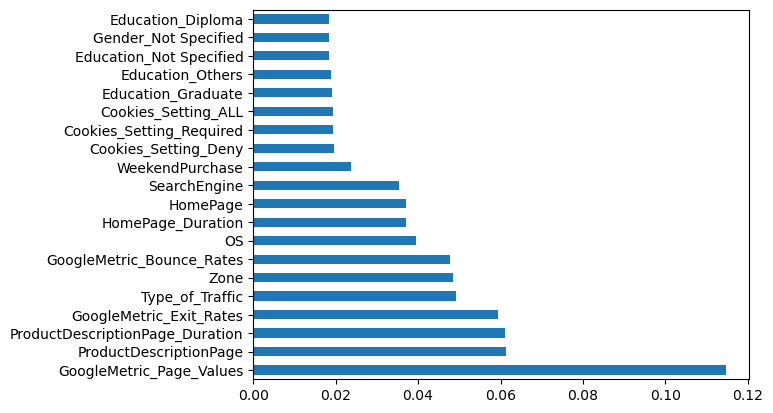

In [47]:
model = ExtraTreesClassifier()
model.fit(train_pp,target)

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=train_pp.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [48]:
# select = SelectKBest(mutual_info_classif,k=3)
# train_fs = select.fit_transform(train_pp,target)
# train_fs.shape

In [49]:
# pca = PCA(random_state=42)
# pca.fit(train_pp)

# variance_ratio = pca.explained_variance_ratio_
# cumulative_variance_ratio = np.cumsum(variance_ratio)
# num_components = range(1, len(variance_ratio)+1)

# plt.plot(num_components, cumulative_variance_ratio)
# plt.axhline(0.99,c='r')
# plt.axvline(51,c='g')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance ratio')
# plt.show()

In [50]:
# pca = PCA(random_state=42, n_components=50)
# train_pca = pca.fit_transform(train_pp)
# test_pca = pca.transform(test_pp)
# train_pca.shape, test_pca.shape

# # tsne = TSNE()
# # train_tsne = tsne.fit_transform(train_out)
# # train_tsne.shape

In [51]:
# plt.scatter(train_ros[:,8],target_ros,c=target_ros)

# ax = plt.axes(projection='3d')
# ax.scatter(train_pca[:,0], train_pca[:,1],target, c=target, cmap='viridis', linewidth=0.5);

In [52]:
# ax = sns.boxplot(data=train_pca,orient='h')

# Multiple models

In [53]:
def apply(models, X, y):
    clfs = []
    train_f1 = []
    eval_f1 = []
    cv_f1 = []
    for model in models:
        clfs.append(model)
        
        models[model].fit(X,y)
        y_pred = models[model].predict(X)
        train_f1.append(f1_score(y,y_pred,average='weighted'))
#         ConfusionMatrixDisplay(confusion_matrix(y,y_pred)).plot()
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
        models[model].fit(X_train, y_train)
        y_pred = models[model].predict(X_test)
        eval_f1.append(f1_score(y_test, y_pred, average='weighted'))
#         ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()
        
#         cv_f1.append(np.mean(cross_val_score(models[model],X,y,scoring=('f1_weighted'),cv=15)))
        
    df = pd.DataFrame({'Models':clfs, 'Training Set':train_f1, 'Evaluation Set':eval_f1})
    return df

In [54]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lrcv = LogisticRegressionCV(random_state=42)
pt = Perceptron(random_state=42)
rc = RidgeClassifier(random_state=42)
rccv = RidgeClassifierCV()
sgd = SGDClassifier(random_state=42, loss='log')
kmn = KMeans(random_state=42)
ac = AgglomerativeClustering()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()
cnb = ComplementNB()
knc = KNeighborsClassifier(n_neighbors=20)
svc = SVC(random_state=42,probability=True)
lsvc = LinearSVC(random_state=42,)
dtc = DecisionTreeClassifier(random_state=42)
etct = ExtraTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42,n_estimators=250)
abc = AdaBoostClassifier(random_state=42,)
bc = BaggingClassifier(random_state=42)
gbc = GradientBoostingClassifier(random_state=42,)
hgbc = HistGradientBoostingClassifier(random_state=42)
etce = ExtraTreesClassifier(random_state=42)
xgb = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.01,  objective='binary:logistic', 
                    gamma=0.1, min_child_weight=7, subsample=0.7, colsample_bytree=0.8, eval_metric='auc', 
                    nthread=4, scale_pos_weight=(len(target) - sum(target))/sum(target), random_state=42)
mlpc = MLPClassifier(random_state=42,activation='logistic',solver='sgd')
sc = StackingClassifier(estimators=[('rfc',rfc),('xgb',xgb),('knc',knc)],final_estimator=abc)
vc = VotingClassifier(estimators=[('abc',abc),('gbc',gbc),('lr',lr),('mlpc',mlpc)])

In [55]:
# models = {'lr':lr, 'lrcv':lrcv, 'rc':rc, 'rccv':rccv, 'sgd':sgd,  
#           'lda':lda, 'qda':qda, 'gnb':gnb, 'knc':knc, 'svc':svc, 'lsvc':lsvc, 'dtc':dtc, 
#           'etct':etct,  'rfc':rfc, 'abc':abc, 'bc':bc, 'gbc':gbc, 'hgbc':hgbc, 'etce':etce, 'xgb':xgb, 
#           'mlpc':mlpc, 'vc':vc}


models = {'clf':sc}

# apply(models, train_pp, target)

# 0	clf	0.230076	0.701393
# clf	0.228305	0.718828
# clf	0.22457	0.721087
# clf	0.22457	0.739196
# clf	0.316943	0.741848 adaboost

In [56]:
# Version 69

# print(apply({'lda':lda},train_enc,target_out))
#Fitting to model with train data
sc.fit(train_pp, target)

#Predicting on test data
y_pred = sc.predict(test_pp)
output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
output.to_csv('submission.csv',index=False)

# train f1 -  0.316943
# val f1 - 0.741848
# Cross val f1 - 0.
# test f1 - 0.

In [57]:
# # Version 68

# # print(apply({'lda':lda},train_enc,target_out))
# #Fitting to model with train data
# sc.fit(train_pp, target)

# #Predicting on test data
# y_pred = sc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.228305
# # val f1 - 0.718828
# # Cross val f1 - 0.
# # test f1 - 0.68661

In [58]:
# # Version 67

# print(apply({'lr':lr},train_enc,target_out))
# #Fitting to model with train data
# lr.fit(train_enc, target_out)

# #Predicting on test data
# y_pred = lr.predict(test_enc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.635583
# # val f1 - 0.621119
# # Cross val f1 - 0.607537
# # test f1 - 0.

In [59]:
# # Version 65

# print(apply({'lr':lr},train_sm,target_sm))
# #Fitting to model with train data
# lr.fit(train_sm, target_sm)

# #Predicting on test data
# y_pred = lr.predict(test_enc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.709849
# # val f1 - 0.705434
# # Cross val f1 - 0.670915
# # test f1 - 0.64555

In [60]:
# # Version 63 - AdaBoost

# # print(apply({'abc':abc},train_pp,target))

# #Fitting to model with train data
# abc.fit(train_pp, target)

# #Predicting on test data
# y_pred = abc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.633402
# # val f1 - 0.631638
# # Cross val f1 - 0.589433
# # test f1 - 0.64434

In [61]:
# Version  - 

# print(apply({'rfc':rfc},train_pca,target))

#Fitting to model with train data
# abc.fit(train_pca, target)

#Predicting on test data
# y_pred = abc.predict(test_pca)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# train f1 -  0.
# val f1 - 0.
# Cross val f1 - 0.
# test f1 - 0.

In [62]:
# # Version  - RandomForest
# param_grid = {'n_estimators':[10,25,50,100],'min_samples_split':[2,5,10,25,50],'min_samples_leaf':[1,2,4,8,10,25,50],
#              'max_depth':[2,4,6,8,10,None],'bootstrap':[True,False]}
# gscv = GridSearchCV(rfc,param_grid=param_grid,cv=7)
# gscv.fit(train_pca, target)
# gscv.best_params_

# Regression Analysis Models

In [63]:
# train1 = train.copy()
# test1 = test.copy()
# train1.shape, test1.shape

In [64]:
# def regFillNA(data,X,y):
#     from sklearn.linear_model import LinearRegression

#     X_train = data[(data[X].isnull() == False) & (data[y].isnull() == False)][[X]]
#     y_train = data[(data[X].isnull() == False) & (data[y].isnull() == False)][y]

#     X_test = data[data[y].isnull() == True][[X]]
# #     X_test1 = data[test1[y].isnull() == True][[X]]

#     lir = LinearRegression()
#     lir.fit(X_train, y_train)
    
#     y_pred = lir.predict(X_test)
# #     y_pred1 = lir.predict(X_test1)
    
#     data.loc[data[y].isnull() == True, y] = y_pred
# #     test1.loc[test1[y].isnull() == True, y] = y_pred1
    
#     return

In [65]:
# train1.isnull().sum(), test1.isnull().sum()

In [66]:
# # Train data
# # regFillNA(train1,'HomePage','HomePage_Duration')
# # regFillNA(train1,'HomePage_Duration','HomePage')

# # regFillNA(train1,'LandingPage','LandingPage_Duration')
# # regFillNA(train1,'LandingPage_Duration','LandingPage')

# regFillNA(train1,'ProductDescriptionPage','ProductDescriptionPage_Duration')
# regFillNA(train1,'ProductDescriptionPage_Duration','ProductDescriptionPage')

# regFillNA(train1,'GoogleMetric_Bounce_Rates','GoogleMetric_Exit_Rates')
# regFillNA(train1,'GoogleMetric_Exit_Rates','GoogleMetric_Bounce_Rates')

# # Test data
# # regFillNA(test1,'HomePage','HomePage_Duration')
# # regFillNA(test1,'HomePage_Duration','HomePage')

# # regFillNA(test1,'LandingPage','LandingPage_Duration')
# # regFillNA(test1,'LandingPage_Duration','LandingPage')

# regFillNA(test1,'ProductDescriptionPage','ProductDescriptionPage_Duration')
# regFillNA(test1,'ProductDescriptionPage_Duration','ProductDescriptionPage')

# regFillNA(test1,'GoogleMetric_Bounce_Rates','GoogleMetric_Exit_Rates')
# regFillNA(test1,'GoogleMetric_Exit_Rates','GoogleMetric_Bounce_Rates')

In [67]:
# X_pv = train1[['GoogleMetric_Bounce_Rates','GoogleMetric_Exit_Rates']]
# X_pv1 = test1[['GoogleMetric_Bounce_Rates','GoogleMetric_Exit_Rates']]
# y_pv = train1['GoogleMetric_Page_Values']
# y_pv1 = test1['GoogleMetric_Page_Values']

# from sklearn.linear_model import LinearRegression

# X_train = X_pv.iloc[y_pv[y_pv.isnull() == False].index.values]
# y_train = y_pv.iloc[y_pv[y_pv.isnull() == False].index.values]
# X_test = X_pv.iloc[y_pv[y_pv.isnull() == True].index.values]
# X_test1 = X_pv1.iloc[y_pv1[y_pv1.isnull() == True].index.values]

# lir = LinearRegression()
# lir.fit(X_train, y_train)

# y_pred = lir.predict(X_test)
# y_pred1 = lir.predict(X_test1)

# train1.loc[train1['GoogleMetric_Page_Values'].isnull() == True, 'GoogleMetric_Page_Values'] = y_pred
# test1.loc[test1['GoogleMetric_Page_Values'].isnull() == True, 'GoogleMetric_Page_Values'] = y_pred1

In [68]:
# train1[num_features] = train1[num_features].fillna(train1[num_features].median())
# test1[num_features] = test1[num_features].fillna(test1[num_features].median())

# train1[cat_features] = train1[cat_features].fillna(train1[cat_features].mode().iloc[0])
# test1[cat_features] = test1[cat_features].fillna(test1[cat_features].mode().iloc[0])

# train1 = pd.get_dummies(train1)
# test1 = pd.get_dummies(test1)

# train1.shape, test1.shape

In [69]:
# for column in train1.columns:
#     train1[column] = np.where(train1[column] < 0, 0, train1[column])
#     test1[column] = np.where(test1[column] < 0, 0, test1[column])

In [70]:
# from sklearn.preprocessing import StandardScaler, FunctionTransformer

# ft = FunctionTransformer(lambda x: np.log(x+1))
# ss = StandardScaler()

# train1[num_features] = ft.fit_transform(train1[num_features])
# test1[num_features] = ft.transform(test1[num_features])

# train1[num_features] = ss.fit_transform(train1[num_features])
# test1[num_features] = ss.transform(test1[num_features])

In [71]:
# from scipy import stats
# outliers =train1[(abs(stats.zscore(train1[num_features])) < 3).all(axis=1)] #calculates mean and std dev for each col.... then it retains all the rows which satisfy that criteria
# print("no of outlier rows",len(train1[num_features])- len(outliers))

In [72]:
# train1_out = train1.iloc[outliers.index.values]
# target1_out = target.iloc[outliers.index.values]

# train1_out.shape, target1_out.shape

In [73]:
# from sklearn.ensemble import IsolationForest

# ift = IsolationForest(random_state=42)
# ift.fit(train1)
# y_ift = ift.predict(train1)
# y_ift1 = ift.predict(test1)

# # y_pred_iforest = np.where(pd.DataFrame(y_iforest,columns=['outliers']) == 1, 1, 0)

# train1['Outliers'] = y_ift
# test1['Outliers'] = y_ift1

# train1.shape, test1.shape

In [74]:
# pca = PCA(random_state=42,n_components='mle')

# train1_pca = pca.fit_transform(train1_out)
# test1_pca = pca.transform(test1)
# train1_pca.shape, test1_pca.shape

In [75]:
# models = {'lr':lr, 'lrcv':lrcv, 'rc':rc, 'rccv':rccv, 'sgd':sgd,  
#           'lda':lda, 'qda':qda, 'gnb':gnb, 'knc':knc, 'svc':svc, 'lsvc':lsvc, 'dtc':dtc, 
#           'etct':etct,  'rfc':rfc, 'abc':abc, 'bc':bc, 'gbc':gbc, 'hgbc':hgbc, 'etce':etce, 'xgb':xgb, 
#           'mlpc':mlpc, 'vc':vc}

# # train_new = train1[['GoogleMetric_Page_Values']]
# # target_new =  target.copy()
# # print(train_new.shape, target_new.shape)


# apply(models, train1_pca, target1_out)

In [76]:
# # # Version  - RandomForest
# param_grid = {'n_estimators':[25,50,100],'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[1,2,3,4,5,6,7],
#              'max_depth':[2,4,6,8,10,None],}
# gscv = GridSearchCV(rfc,param_grid=param_grid,cv=15)
# rfc = RandomForestClassifier(random_state=42,max_depth=20)

# print(apply({'rfc':rfc},train1_pca,target1_out))

In [77]:
# # Version  - AdaBoost

# print(apply({'abc':abc},train1_pca,target))

# #Fitting to model with train data
# svc.fit(train1_pca, target)

# #Predicting on test data
# y_pred = svc.predict(test1_pca)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.624995
# # val f1 - 0.612864
# # Cross val f1 - 0.585047
# # test f1 - 0.

In [78]:
# # Version 62 - SVC

# # print(apply({'svc':svc},train1_pca,target))

# #Fitting to model with train data
# svc.fit(train1_pca, target)

# #Predicting on test data
# y_pred = svc.predict(test1_pca)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.639078
# # val f1 - 0.619801
# # Cross val f1 - 0.60734
# # test f1 - 0.63994

In [79]:
# # Version 61 - Gradient Boosting

# # print(apply({'gbc':gbc},train1,target))

# #Fitting to model with train data
# gbc.fit(train1, target)

# #Predicting on test data
# y_pred = gbc.predict(test1)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.638459
# # val f1 - 0.623119
# # Cross val f1 - 0.622678
# # test f1 - 0.63858

# GaussianNB

In [80]:
# # Version 50

# print(apply({'gnb':gnb},train_pca,target_out))

# #Fitting to model with train data
# gnb.fit(train_pca, target_out)

# #Predicting on test data
# y_pred = gnb.predict(test_pca)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.630353
# # val f1 - 0.605497
# # Cross val f1 - 0.543384
# # test f1 - 0.62403

# QuadraticDiscriminant Analysis

In [81]:
# # Version 49

# print(apply({'qda':qda},train_pca,target_out))

# #Fitting to model with train data
# qda.fit(train_pca, target_out)

# #Predicting on test data
# y_pred = qda.predict(test_pca)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.630353
# # val f1 - 0.605497
# # Cross val f1 - 0.543384
# # test f1 - 0.62403

# Voting Classifier

In [82]:
# # Version 38

# #Fitting to model with train data
# vc.fit(train_pp, target)

# #Predicting on test data
# y_pred = vc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.621297
# # train f1 -  0.625283
# # Cross val f1 - 0.570389
# # test f1 - 0.64373

# GradientBoostingClassifier

In [83]:
# # Version 39

# #Fitting to model with train data
# gbc.fit(train_pp, target)

# #Predicting on test data
# y_pred = gbc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.636565
# # val f1 - 0.627362
# # Cross val f1 - 0.504940
# # test f1 - 0.6404

# Stacking Classifier

In [84]:
# # Version 37

# #Fitting to model with train data
# sc.fit(train_pp, target)

# #Predicting on train data
# y_pred = sc.predict(train_pp)
# print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Predicting on test data
# y_pred = sc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.633844
# # train f1 -  0.487886
# # Cross val f1 - 0.636837
# # test f1 - 0.48386

# RidgeClassifierCV

In [85]:
# # Version 35

# #preprocessing
# trainf = ct.fit_transform(train)
# testf = ct.fit_transform(test)
# print(trainf.shape, testf.shape)

# #Fitting to model with train data
# rccv.fit(trainf, target)

# #Predicting on train data
# y_pred = rccv.predict(trainf)
# print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Cross validating 
# cv = cross_validate(rccv,trainf, target, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# #Predicting on test data
# y_pred = rccv.predict(testf)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.6249833695475312
# # train f1 -  0.6249055588990975
# # Cross val f1 - 0.5284010307032299
# # test f1 - 0.64449

In [86]:
# #HyperParameter Tuning
# # Version 

# #preprocessing
# trainf = ct.fit_transform(train)
# testf = ct.fit_transform(test)
# print(trainf.shape, testf.shape)

# #GridSeachCV
# param_grid = {'solver':['svd','lsqr','eigen'],'shrinkage':[None,'auto'],'n_components':[1,5,10,20]}
# gscv = GridSearchCV(lda,param_grid=param_grid,cv=5,scoring='f1_weighted')

# #Fitting to model with train data
# gscv.fit(trainf, target)
# print(gscv.best_params_)
# print(gscv.best_score_)

# #Predicting on train data
# y_pred = gscv.predict(trainf)
# print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Cross validating 
# cv = cross_validate(gscv,trainf, target, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# #Predicting on test data
# y_pred = gscv.predict(testf)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.6241756237719197
# # train f1 -  0.6245024902519857
# # Cross val f1 - 0.5171610879168361
# # test f1 - 

# LinearDiscriminant Analysis

In [87]:
# # Version 34

# #preprocessing
# trainf = ct.fit_transform(train)
# testf = ct.fit_transform(test)
# print(trainf.shape, testf.shape)

# #Fitting to model with train data
# lda.fit(trainf, target)

# #Predicting on train data
# y_pred = lda.predict(trainf)
# print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Cross validating 
# cv = cross_validate(lda,trainf, target, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# #Predicting on test data
# y_pred = lda.predict(testf)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.6241756237719197
# # train f1 -  0.6245024902519857
# # Cross val f1 - 0.5173793424368336
# # test f1 - 0.64524

In [88]:
#HyperParameter Tuning

# #preprocessing
# trainf = ct.fit_transform(train)
# testf = ct.fit_transform(test)
# print(trainf.shape, testf.shape)

# #GridSeachCV
# param_grid = {'solver':['svd','lsqr','eigen'],'shrinkage':[None,'auto'],'n_components':[1,5,10,20]}
# gscv = GridSearchCV(lda,param_grid=param_grid,cv=5,scoring='f1_weighted')

# #Fitting to model with train data
# gscv.fit(trainf, target)
# print(gscv.best_params_)
# print(gscv.best_score_)

# #Predicting on train data
# y_pred = gscv.predict(trainf)
# print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Cross validating 
# cv = cross_validate(gscv,trainf, target, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# #Predicting on test data
# y_pred = gscv.predict(testf)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.6241756237719197
# # train f1 -  0.6245024902519857
# # Cross val f1 - 0.5171610879168361
# # test f1 - 

# Voting Classifier

In [89]:
# # Version 33

# #preprocessing
# trainf = ct.fit_transform(train)
# testf = ct.fit_transform(test)
# print(trainf.shape, testf.shape)

# #Fitting to model with train data
# vc.fit(trainf, target)

# #Predicting on train data
# # y_pred = vc.predict(trainf)
# # print('train f1 - ',f1_score(target, y_pred, average='weighted'))

# #Cross validating 
# # cv = cross_validate(vc,trainf, target, scoring="f1_weighted",cv=5)
# # print('Cross val f1 - ',max(cv['test_score']))

# #Predicting on test data
# y_pred = vc.predict(testf)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # val f1 - 0.6221204423116229
# # train f1 -  0.6299671481676846
# # Cross val f1 -  0.5310125188484679
# # test f1 - 0.64282

# Dummy Classifier without modifying any data

In [90]:
# y_train = train['Made_Purchase']
# del train['Made_Purchase']
# X_train = train

# X_train.shape, y_train.shape

In [91]:
# from sklearn.dummy import DummyClassifier

# dc = DummyClassifier(strategy="most_frequent")
# dc.fit(X_train, y_train)

In [92]:
# y_pred_dc = dc.predict(test)
# output_dc = pd.DataFrame({'id':range(len(y_pred_dc)),'Made_Purchase':y_pred_dc})
# output_dc.to_csv('submission.csv',index=False)

# RandomForest Classifier

In [93]:
# from sklearn.ensemble import RandomForestClassifier

# rfc = RandomForestClassifier()
# rfc.fit(train_pp, y)
# y_pred_rfc = rfc.predict(test_pp)

# output_rfc = pd.DataFrame({'id':range(len(y_pred_rfc)),'Made_Purchase':y_pred_rfc})
# output_rfc.to_csv('submission.csv',index=False)

Got 0.46749 score from the submission without applying log scaling

# Logistic Regression

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline, FeatureUnion
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from sklearn.feature_selection import SelectPercentile, chi2


# si = SimpleImputer(strategy='most_frequent')
# train_si = pd.DataFrame(si.fit_transform(train),columns=train.columns)
# test_si = pd.DataFrame(si.transform(test), columns=test.columns)

# train_ohe = pd.get_dummies(train_si[cat_features])
# test_ohe = pd.get_dummies(test_si[cat_features])

# train_pp = pd.concat((train_si[num_features+rem_features].astype(float),train_ohe),axis=1)
# test_pp = pd.concat((test_si[num_features+rem_features].astype(float),test_ohe),axis=1)

# sl = SelectPercentile(chi2,percentile=50)
# train_final = sl.fit_transform(train_pp,y)
# test_final = sl.transform(test_pp)

# lr = LogisticRegression(random_state=0)
# lr.fit(train_final,y)
# y_pred = lr.predict(test_final)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)
# train_final.shape

In [95]:
# print('lr', max(cross_val_score(lr,train_pp,y,scoring=('f1_weighted'),cv=5)))

train - 0.68
test - 0.63661 test score with simple imputer most frequent, No scaling, ohe

# HyperParameter Tuning for Logistic Regression

In [96]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score


# # Impute missing values with most frequent
# train_pp = train.fillna(train.mode().iloc[0])
# test_pp = test.fillna(train.mode().iloc[0])

# # One-hot encode categorical features
# train_pp = pd.get_dummies(train_pp)
# test_pp = pd.get_dummies(test_pp)

# # Scale numerical features
# ss = StandardScaler()
# train_pp[num_features] = ss.fit_transform(train_pp[num_features])
# test_pp[num_features] = ss.transform(test_pp[num_features])

# # Select the k best features
# selector = SelectKBest(chi2, k=10)
# train_pp = selector.fit_transform(train_pp, y)
# test_pp = selector.transform(test_pp)


# # Balance classes
# ros = RandomOverSampler()
# train_pp, y = ros.fit_resample(train_pp, y)

# # Perform Grid Search to find optimal hyperparameters
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
# clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
# clf.fit(train_pp, y)


# y_pred = clf.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# print(max(cross_val_score(clf,train_pp,y,scoring=('f1_weighted'),cv=5)))

In [97]:
# print(clf.best_params_)
# clf.best_score_

train - 0.4864
test - 0.64161

In [98]:
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile, f_classif
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score


# # Impute missing values with most frequent
# train_pp = train.fillna(train.mode().iloc[0])
# test_pp = test.fillna(train.mode().iloc[0])

# # One-hot encode categorical features
# train_pp = pd.get_dummies(train_pp)
# test_pp = pd.get_dummies(test_pp)

# # Scale numerical features
# train_pp[num_features] = np.log(train_pp[num_features]+1)
# test_pp[num_features] = np.log(test_pp[num_features]+1)
# ss = StandardScaler()
# train_pp[num_features] = ss.fit_transform(train_pp[num_features])
# test_pp[num_features] = ss.transform(test_pp[num_features])

# # Select the k best features
# selector = SelectKBest(f_classif, k=10)
# train_pp = selector.fit_transform(train_pp, y)
# test_pp = selector.transform(test_pp)


# # Balance classes
# ros = RandomOverSampler(random_state=0)
# train_pp, y = ros.fit_resample(train_pp, y)

# # Perform Grid Search to find optimal hyperparameters
# param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
# clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, n_jobs=-1)
# clf.fit(train_pp, y)


# y_pred = clf.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# print(max(cross_val_score(clf,train_pp,y,scoring=('f1_weighted'),cv=5)))
# print(clf.best_params_)
# print(clf.best_score_)

train - 0.66
test - 0.64

In [99]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report


# #Filling Missing values with most frequent
# X_train = train.fillna(train.mode().iloc[0])
# X_test = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying log transformation
# X_train[num_features] = np.log(X_train[num_features]+1)
# X_test[num_features] = np.log(X_test[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# X_train[num_features] = scaler.fit_transform(X_train[num_features])
# X_test[num_features] = scaler.transform(X_test[num_features])
# print(f'After scaling, shape of the train and test {X_train.shape, X_train.shape}')

# #Encoding the categorical features
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
# print(f'After Encoding, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying model
# lr = LogisticRegression(random_state=0,solver="lbfgs")
# lr.fit(X_train,y)
# y_pred = lr.predict(X_test)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y,y_pred))

train - 0.63
test - 0.6454

In [100]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report


# #Filling Missing values with most frequent
# X_train = train.fillna(train.mode().iloc[0])
# X_test = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying log transformation
# X_train[num_features] = np.log(X_train[num_features]+1)
# X_test[num_features] = np.log(X_test[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# X_train[num_features] = scaler.fit_transform(X_train[num_features])
# X_test[num_features] = scaler.transform(X_test[num_features])
# print(f'After scaling, shape of the train and test {X_train.shape, X_train.shape}')

# #Encoding the categorical features
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
# print(f'After Encoding, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying model
# lr = LogisticRegression(random_state=0,solver="lbfgs",C=0.001)
# lr.fit(X_train,y)
# y_pred = lr.predict(X_test)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y,y_pred))

train - 0.62
test - 0.64509

In [101]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report


# #Filling Missing values with most frequent
# X_train = train.fillna(train.mode().iloc[0])
# X_test = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying log transformation
# X_train[num_features] = np.log(X_train[num_features]+1)
# X_test[num_features] = np.log(X_test[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# X_train[num_features] = scaler.fit_transform(X_train[num_features])
# X_test[num_features] = scaler.transform(X_test[num_features])
# print(f'After scaling, shape of the train and test {X_train.shape, X_train.shape}')

# #Encoding the categorical features
# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)
# print(f'After Encoding, shape of the train and test {X_train.shape, X_test.shape}')

# #Applying model
# lr = LogisticRegression(random_state=0,solver="lbfgs",class_weight="balanced")
# lr.fit(X_train,y)
# y_pred = lr.predict(X_test)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y,y_pred))

train - 0.63
test - 0.63858

In [102]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split


# #Filling Missing values with most frequent
# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {train1.shape, test1.shape}')

# #Applying log transformation
# train1[num_features] = np.log(train1[num_features]+1)
# test1[num_features] = np.log(test1[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_features] = scaler.fit_transform(train1[num_features])
# test1[num_features] = scaler.transform(test1[num_features])
# print(f'After scaling, shape of the train and test {train1.shape, test1.shape}')

# #Encoding the categorical features
# train1 = pd.get_dummies(train1)
# test1 = pd.get_dummies(test1)
# print(f'After Encoding, shape of the train and test {train1.shape, test1.shape}')

# #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(train1,y,test_size=0.2,random_state=0,stratify=y)

# #Applying model
# lrcv = LogisticRegressionCV(random_state=0, cv=5, scoring="f1", solver="lbfgs", max_iter=1000)
# lrcv.fit(train1,y)
# y_pred = lrcv.predict(test1)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y_test,y_pred))
# # lrcv.Cs_

train - 0.62
test - 0.6454

In [103]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegressionCV
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split


# #Filling Missing values with most frequent
# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {train1.shape, test1.shape}')

# #Applying log transformation
# train1[num_features] = np.log(train1[num_features]+1)
# test1[num_features] = np.log(test1[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_features] = scaler.fit_transform(train1[num_features])
# test1[num_features] = scaler.transform(test1[num_features])
# print(f'After scaling, shape of the train and test {train1.shape, test1.shape}')

# #Encoding the categorical features
# train1 = pd.get_dummies(train1)
# test1 = pd.get_dummies(test1)
# print(f'After Encoding, shape of the train and test {train1.shape, test1.shape}')

# #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(train1,y,test_size=0.2,random_state=0,stratify=y)

# #Applying model
# lrcv = LogisticRegressionCV(random_state=0, cv=5, scoring="f1", solver="newton-cg", max_iter=1000)
# lrcv.fit(train1,y)
# y_pred = lrcv.predict(test1)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y_test,y_pred))
# # lrcv.Cs_

train - 0.62
test - 0.6454

In [104]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV


# #Filling Missing values with most frequent
# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {train1.shape, test1.shape}')

# #Applying log transformation
# train1[num_features] = np.log(train1[num_features]+1)
# test1[num_features] = np.log(test1[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_features] = scaler.fit_transform(train1[num_features])
# test1[num_features] = scaler.transform(test1[num_features])
# print(f'After scaling, shape of the train and test {train1.shape, test1.shape}')

# #Encoding the categorical features
# train1 = pd.get_dummies(train1)
# test1 = pd.get_dummies(test1)
# print(f'After Encoding, shape of the train and test {train1.shape, test1.shape}')

# #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(train1,y,test_size=0.2,random_state=0,stratify=y)

# #Applying model
# lr = LogisticRegression(random_state=0,)
# param_grid = {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'class_weight':[None, 'balanced'], 
#               'solver':['lbfgs','newton-cg'], 'max_iter':[100, 500, 1000], 'warm_start': [True, False]}
# gscv = GridSearchCV(lr,param_grid=param_grid,scoring="f1",cv=5)
# gscv.fit(train1,y)
# y_pred = gscv.predict(test1)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # print(classification_report(y_test,y_pred))

In [105]:
# print(gscv.best_params_)
# print(gscv.best_score_)

train - 0.4695309446254182
test - 0.58887

In [106]:
# # Version 46

# print(apply({'lr':lr},train_out,target_out))

# #Fitting to model with train data
# lr.fit(train_out, target_out)

# #Predicting on test data
# y_pred = lr.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.619525
# # val f1 - 0.621435
# # Cross val f1 - 0.685885
# # test f1 - 0.64524

In [107]:
# # Threshold checking

# # print(apply({'lr':lr},train_out,target_out))

# X_train, X_test, y_train, y_test = train_test_split(train_out, target_out, test_size=0.2,stratify=target_out)

# #Fitting to model with train data
# lr.fit(X_train, y_train)

# #Predicting on test data
# y_proba = lr.predict_proba(X_test)
# df = {'Threshold':[],'Accuracy':[],'Precision':[],'Recall':[],'f1':[]}
# for i in range(0,10):
#     y_pred = np.where(y_proba[:,1] < (i/10), False, True) #0.36 to 0.46
#     df['Threshold'].append(i/10)
#     df['Accuracy'].append(accuracy_score(y_test,y_pred))
#     df['Precision'].append(precision_score(y_test,y_pred,average='weighted'))
#     df['Recall'].append(recall_score(y_test,y_pred,average='weighted'))
#     df['f1'].append(f1_score(y_test,y_pred,average='weighted'))
    
# pd.DataFrame(df)
# # print(y_proba[:,1])
# # print(y_pred)
# # print(classification_report(target_out,y_pred))

# # fpr, tpr, thresholds = roc_curve(target_out, y_pred)
# # roc_auc = auc(fpr, tpr)
# # display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='example estimator')
# # display.plot()
# # plt.show()

In [108]:
# # Version 47

# #Fitting to model with train data
# lr.fit(train_out, target_out)

# #Predicting on test data
# y_proba = lr.predict_proba(test_pp)[:,1]
# y_pred = np.where(y_proba < 0.39, False, True)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.
# # val f1 - 0.
# # Cross val f1 - 0.
# # test f1 - 0.64191

In [109]:
# Version 

# train_lr = train[['GoogleMetric_Page_Values']]
# test_lr = test[['GoogleMetric_Page_Values']]
# target_lr = target.copy()
# train_lr = train_lr.fillna(train_lr.mode().iloc[0])
# test_lr = test_lr.fillna(test_lr.mode().iloc[0])
# print(train_lr.shape, target_lr.shape, test_lr.shape)

# print(apply({'lr':lr},train_out,target_out))

#Fitting to model with train data
# lr.fit(train_lr, target_lr)

#Predicting on test data
# y_pred = lr.predict(test_lr)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# train f1 -  0.631952
# val f1 - 0.631286
# Cross val f1 - 0.78848
# test f1 - 0.

# HistGradientBoostingClassifier

In [110]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import classification_report
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.model_selection import train_test_split


# #Filling Missing values with most frequent
# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(train.mode().iloc[0])
# print(f'After numerical imputing, shape of the train and test {train1.shape, test1.shape}')

# #Applying log transformation
# train1[num_features] = np.log(train1[num_features]+1)
# test1[num_features] = np.log(test1[num_features]+1)

# #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_features] = scaler.fit_transform(train1[num_features])
# test1[num_features] = scaler.transform(test1[num_features])
# print(f'After scaling, shape of the train and test {train1.shape, test1.shape}')

# #Encoding the categorical features
# train1 = pd.get_dummies(train1)
# test1 = pd.get_dummies(test1)
# print(f'After Encoding, shape of the train and test {train1.shape, test1.shape}')

# # #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(train1,y,test_size=0.2,random_state=0,stratify=y)

# #Applying model on validation set
# hgbc = HistGradientBoostingClassifier(random_state=0)
# hgbc.fit(X_train,y_train)
# y_pred = hgbc.predict(X_test)
# print(classification_report(y_test,y_pred))

# #Applying model on test set
# hgbc.fit(train1, y)
# y_pred = hgbc.predict(test1)

# #exporting the output to csv
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

train - 0.64
validation - 0.61
test - 0.63827

In [111]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import HistGradientBoostingClassifier
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer


# #Filling Missing values with most frequent
# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values"]
# imputer = IterativeImputer()
# train1[num_cols] = imputer.fit_transform(train[num_cols])
# # train1 = train.fillna(train.median())
# print(f'After numerical imputing, shape of the train and test {train1.shape}')

# #Applying log transformation
# train1[num_cols] = np.log(train1[num_cols]+1)
# print(train1['HomePage_Duration'].hist())

# #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# print(f'After scaling, shape of the train and test {train1.shape}')
# print(train1['HomePage_Duration'].hist())

# #Encoding the categorical features
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", 
#             "Cookies_Setting", "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]
# train2 = pd.get_dummies(train1,columns=cat_cols)
# print(f'After Encoding, shape of the train and test {train2.shape}')

# #splitting the data
# X_train, X_test, y_train, y_test = train_test_split(train2,y,test_size=0.2,random_state=0,stratify=y)

# #Applying model
# hgbc = HistGradientBoostingClassifier()
# lr = LogisticRegression(random_state=0, max_iter=1000)
# hgbc.fit(X_train,y_train)
# y_pred = hgbc.predict(X_test)

# # output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# # output.to_csv('submission.csv',index=False)

# print(classification_report(y_test,y_pred))

# Perceptron

In [112]:
# from sklearn.linear_model import Perceptron
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from sklearn.feature_selection import SelectPercentile, chi2


# si = SimpleImputer(strategy='most_frequent')
# train_si = pd.DataFrame(si.fit_transform(train),columns=train.columns)
# test_si = pd.DataFrame(si.transform(test), columns=test.columns)

# train_ohe = pd.get_dummies(train_si[cat_features])
# test_ohe = pd.get_dummies(test_si[cat_features])

# train_pp = pd.concat((train_si[num_features+rem_features].astype(float),train_ohe),axis=1)
# test_pp = pd.concat((test_si[num_features+rem_features].astype(float),test_ohe),axis=1)

# # sl = SelectPercentile(chi2,percentile=50)
# # train_final = sl.fit_transform(train_pp,y)
# # test_final = sl.transform(test_pp)

# pt = Perceptron(random_state=0)
# pt.fit(train_pp,y)
# y_pred = pt.predict(test_pp)

# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)
# train_pp.shape

In [113]:
# print(max(cross_val_score(pt,train_pp,y,scoring=('f1_weighted'),cv=5)))

0.43779 test score - overfit

# RandomForest Classifier

In [114]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# from sklearn.feature_selection import SelectPercentile, chi2


# # si = SimpleImputer(strategy='most_frequent')
# # train_si = pd.DataFrame(si.fit_transform(train),columns=train.columns)
# # test_si = pd.DataFrame(si.transform(test), columns=test.columns)

# train_ohe = pd.get_dummies(train[cat_features])
# test_ohe = pd.get_dummies(test[cat_features])

# train_pp = pd.concat((train[num_features+rem_features],train_ohe),axis=1)
# test_pp = pd.concat((test[num_features+rem_features],test_ohe),axis=1)

# train_pp = train_pp.replace(0, np.nan)
# train_pp = train_pp.fillna(train_pp.median())

# test_pp = test_pp.replace(0, np.nan)
# test_pp = test_pp.fillna(test_pp.median())

# # sl = SelectPercentile(chi2,percentile=50)
# # train_final = sl.fit_transform(train_pp,y)
# # test_final = sl.transform(test_pp)

# rfc = RandomForestClassifier(random_state=0)
# rfc.fit(train_pp,y)
# y_pred = rfc.predict(test_pp)

# print(max(cross_val_score(rfc,train_pp,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)
# # train_pp.shape

train - 0.5940749505978997
test - 0.38596

In [115]:
# from sklearn.tree import DecisionTreeClassifier

# dtc = DecisionTreeClassifier(random_state=0)

# print(max(cross_val_score(dtc,train_pp,y,scoring=('f1_weighted'),cv=5)))

# AdaBoostClassifier

In [116]:
# #Versoin 23
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier



# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
# #     ('add',FunctionTransformer(lambda x: np.add(x,1))),
# #     ('log',FunctionTransformer(np.log2)),
# #     ('scaler',StandardScaler()),
#     ('scaler', MinMaxScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ],remainder='passthrough')

# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', AdaBoostClassifier(random_state=0))
# ])

# X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.15,stratify=y,)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# clf.fit(train,y)
# y_pred = clf.predict(test)
# print(max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

train - 0.62, test - 0.64434

In [117]:
# # Version 43

# #Fitting to model with train data
# abc.fit(train_out, target_out)

# #Predicting on test data
# y_pred = abc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.629382
# # val f1 - 0.628533
# # Cross val f1 - 0.527821
# # test f1 - 0.64782

In [118]:
# # HyperParameter Tuning

# param_grid = {'n_estimators':[25,50,100,150],'learning_rate':[0.5,1,10,20]}
# gscv = GridSearchCV(abc, param_grid=param_grid, scoring='f1_weighted',cv=7)

# abc = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1)
# print(apply({'abc':abc},train_out,target_out))

# #Fitting to model with train data
# gscv.fit(train_out, target_out)
# print(gscv.best_params_)
# print(gscv.best_score_)

# #Predicting on test data
# y_pred = abc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.629382
# # val f1 - 0.628533
# # Cross val f1 - 0.527821
# # test f1 - 0.64782

In [119]:
# # Version 52

# train_abc = train.copy()
# target_abc = target.copy()
# train_abc = train_abc.fillna(train_abc.median().iloc[0])
# train_abc = pd.get_dummies(train_abc)
# print(train_abc.shape, target_abc.shape)

# param_grid = {'n_estimators':[50],'learning_rate':[1]}
# gscv = GridSearchCV(abc, param_grid=param_grid, scoring='f1_weighted',cv=7)

# #Fitting to model with train data
# gscv.fit(train_abc, target_abc)
# print(gscv.best_params_)
# print(gscv.best_score_)
# print(gscv.best_estimator_.feature_importances_)

In [120]:
# train

In [121]:
# # Version 53

# train_abc = train[['GoogleMetric_Page_Values']]
# test_abc = test[['GoogleMetric_Page_Values']]
# target_abc = target.copy()
# train_abc = train_abc.fillna(train_abc.mode().iloc[0])
# test_abc = test_abc.fillna(test_abc.mode().iloc[0])
# print(train_abc.shape, target_abc.shape, test_abc.shape)

# abc = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1)
# print(apply({'abc':abc},train_abc,target_abc))

# #Fitting to model with train data
# abc.fit(train_abc, target_abc)

# #Predicting on test data
# y_pred = abc.predict(test_abc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.631952
# # val f1 - 0.631286
# # Cross val f1 - 0.78848
# # test f1 - 0.64524

In [122]:
# # Version 54

# train_abc = train[['ProductDescriptionPage_Duration','GoogleMetric_Exit_Rates','GoogleMetric_Page_Values']]
# test_abc = test[['ProductDescriptionPage_Duration','GoogleMetric_Exit_Rates','GoogleMetric_Page_Values']]
# target_abc = target.copy()
# train_abc = train_abc.fillna(train_abc.mode().iloc[0])
# test_abc = test_abc.fillna(test_abc.mode().iloc[0])
# print(train_abc.shape, target_abc.shape, test_abc.shape)

# abc = AdaBoostClassifier(random_state=42, n_estimators=50, learning_rate=1)
# print(apply({'abc':abc},train_abc,target_abc))

# #Fitting to model with train data
# abc.fit(train_abc, target_abc)

# #Predicting on test data
# y_pred = abc.predict(test_abc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.631168
# # val f1 - 0.626171
# # Cross val f1 - 0.838604
# # test f1 - 0.64615

In [123]:
# # Version 55

# train_abc = train.copy()
# test_abc = test.copy()
# target_abc = target.copy()

# train_abc[num_features] = simn.fit_transform(train_abc[num_features])
# test_abc[num_features] = simn.transform(test_abc[num_features])

# train_abc[cat_features] = simf.fit_transform(train_abc[cat_features])
# test_abc[cat_features] = simf.transform(test_abc[cat_features])

# train_abc = pd.get_dummies(train_abc)
# test_abc = pd.get_dummies(test_abc)

# train_abc = ss.fit_transform(train_abc)
# test_abc = ss.transform(test_abc)
# print(train_abc.shape, target_abc.shape, test_abc.shape)

# abc = AdaBoostClassifier(random_state=42, n_estimators=230, learning_rate=0.4, algorithm='SAMME')
# print(apply({'abc':abc},train_abc,target_abc))

# #Fitting to model with train data
# abc.fit(train_abc, target_abc)

# #Predicting on test data
# y_pred = abc.predict(test_abc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.62368
# # val f1 - 0.626406
# # Cross val f1 - 0.721521
# # test f1 - 0.64418

In [124]:
# # Version 58


# train_abc = train.dropna()
# train_abc = pd.get_dummies(train_abc)

# target_abc = target.iloc[train_abc.index.values]

# test_abc = test.fillna(test.mode().iloc[0])
# test_abc = pd.get_dummies(test_abc)

# print(train_abc.shape, target_abc.shape, test_abc.shape)

# print(apply({'abc':abc},train_abc,target_abc))

# # #Fitting to model with train data
# abc.fit(train_abc, target_abc)

# # #Predicting on test data
# y_pred = abc.predict(test_abc)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.636453
# # val f1 - 0.63853
# # Cross val f1 - 0.705808
# # test f1 - 0.64358

In [125]:
# output['Made_Purchase'].value_counts(normalize=True)

# Logistic

In [126]:
# #Versoin 24
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier



# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
# #     ('add',FunctionTransformer(lambda x: np.add(x,1))),
# #     ('log',FunctionTransformer(np.log2)),
# #     ('scaler',StandardScaler()),
#     ('scaler', MinMaxScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ],remainder='passthrough')

# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', LogisticRegression(random_state=0, solver='saga'))
# ])

# X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.15,stratify=y,)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

# clf.fit(train,y)
# y_pred = clf.predict(test)
# print(max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

train - 0.57, test - 0.63312

In [127]:
# #Versoin 25
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report, f1_score
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier



# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='median')),
# #     ('add',FunctionTransformer(lambda x: np.add(x,1))),
# #     ('log',FunctionTransformer(np.log2)),
# #     ('scaler',StandardScaler()),
#     ('scaler', MinMaxScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, num_cols),
#     ('cat', categorical_transformer, cat_cols)
# ],remainder='passthrough')

# clf = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('classifier', SGDClassifier(random_state=0, loss='log', penalty='l2'))
# ])

# X_train, X_test, y_train, y_test = train_test_split(train,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(train, y)
# y_pred = clf.predict(train)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train,y)
# y_pred = clf.predict(test)
# print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

rain f1 -  0.6132134406837145
Validation f1 -  0.577857344094778
Cross val f1 -  0.4900276614062308
test - 0.61282

# SVC

In [128]:
# #Versoin 26
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report, f1_score
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
# from sklearn.feature_selection import RFECV



# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()
# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')
# mms = MinMaxScaler()
# train1[num_cols] = simd.fit_transform(train[num_cols])
# train1[cat_cols] = simf.fit_transform(train[cat_cols])

# test1[num_cols] = simd.transform(test[num_cols])
# test1[cat_cols] = simf.transform(test[cat_cols])

# #Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# # train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# test1[num_cols] = scaler.fit_transform(test1[num_cols])
# # print(f'After scaling, shape of the train and test {train1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data,columns=cat_cols)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]

# #Applying model
# clf = SVC(random_state=0, kernel='rbf')
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

Validation f1 -  0.6122958822338578
train f1 -  0.6357532050852699
Cross val f1 -  0.5589978465277134
test - 0.64267

In [129]:
# #Versoin 27
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, MinMaxScaler
# from sklearn.linear_model import LogisticRegression, SGDClassifier
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.metrics import classification_report, f1_score
# from xgboost import XGBClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
# from sklearn.feature_selection import RFECV



# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()
# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')
# mms = MinMaxScaler()
# train1[num_cols] = simd.fit_transform(train[num_cols])
# train1[cat_cols] = simf.fit_transform(train[cat_cols])

# test1[num_cols] = simd.transform(test[num_cols])
# test1[cat_cols] = simf.transform(test[cat_cols])

# #Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# # train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# test1[num_cols] = scaler.fit_transform(test1[num_cols])
# # print(f'After scaling, shape of the train and test {train1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data,columns=cat_cols)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]

# #Applying model
# clf = SVC(random_state=0, kernel='poly')
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))

# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

Validation f1 -  0.6003592792066459
train f1 -  0.6439486661515397
Cross val f1 -  0.5531500442891335
test - 0.6307

In [130]:
# # Version 48

# # print(apply({'svc':svc},train_out,target_out))

# #Fitting to model with train data
# svc.fit(train_out, target_out)

# #Predicting on test data
# y_pred = svc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.631981
# # val f1 - 0.620467
# # Cross val f1 - 0.671724
# # test f1 - 0.64237

# MLPClassifier

In [131]:
# #Versoin 29


# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()

# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')

# train1[num_cols] = simd.fit_transform(train[num_cols])
# test1[num_cols] = simd.transform(test[num_cols])

# train1[cat_cols] = simf.fit_transform(train[cat_cols])
# test1[cat_cols] = simf.transform(test[cat_cols])

# #log Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# test1[num_cols] = scaler.transform(test1[num_cols])
# print(f'After scaling, shape of the train and test {train1.shape}, {test1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data,columns=cat_cols)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]
# print(f'After encoding, shape of the train and test {train_data.shape}, {test_data.shape}')

# #Applying model
# clf = MLPClassifier(random_state=0)
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))
 
# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

Validation f1 -  0.5252807611815672

train f1 -  0.7202067359118478

Cross val f1 -  0.4683578988526504

test - 0.52932

In [132]:
# #Versoin 30


# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()

# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')

# # train1[num_cols] = simd.fit_transform(train[num_cols])
# # test1[num_cols] = simd.transform(test[num_cols])

# # train1[cat_cols] = simf.fit_transform(train[cat_cols])
# # test1[cat_cols] = simf.transform(test[cat_cols])

# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(test.mode().iloc[0])

# #log Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# # scaler = StandardScaler()
# # train1[num_cols] = scaler.fit_transform(train1[num_cols])
# # test1[num_cols] = scaler.transform(test1[num_cols])
# # print(f'After scaling, shape of the train and test {train1.shape}, {test1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]
# print(f'After encoding, shape of the train and test {train_data.shape}, {test_data.shape}')

# #Applying model
# clf = MLPClassifier(random_state=0)
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))
 
# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

Validation f1 -  0.5705862764686295

train f1 -  0.6821102255593041

test - 0.57826

In [133]:
# #Versoin 31


# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()

# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')

# # train1[num_cols] = simd.fit_transform(train[num_cols])
# # test1[num_cols] = simd.transform(test[num_cols])

# # train1[cat_cols] = simf.fit_transform(train[cat_cols])
# # test1[cat_cols] = simf.transform(test[cat_cols])

# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(test.mode().iloc[0])

# #log Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# test1[num_cols] = scaler.transform(test1[num_cols])
# print(f'After scaling, shape of the train and test {train1.shape}, {test1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]
# print(f'After encoding, shape of the train and test {train_data.shape}, {test_data.shape}')

# #Applying model
# clf = MLPClassifier(random_state=0, max_iter=1000, activation='logistic', solver='sgd')
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))
 
# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

Validation f1 -  0.6166792534253965
train f1 -  0.6219973485353057
Cross val f1 -  0.5784852656720628
test - 0.64388

In [134]:
# #Versoin 32


# num_cols = ["HomePage", "HomePage_Duration", "LandingPage", "LandingPage_Duration", 
#             "ProductDescriptionPage", "ProductDescriptionPage_Duration", "GoogleMetric_Bounce_Rates", 
#             "GoogleMetric_Exit_Rates", "GoogleMetric_Page_Values","SeasonalPurchase"]
# cat_cols = ["OS", "SearchEngine", "Zone", "Type_of_Traffic", "CustomerType", "Gender", "Cookies_Setting", 
#             "Education", "Marital_Status", "Month_SeasonalPurchase", "WeekendPurchase"]

# train1 = train.copy()
# test1 = test.copy()

# #Imputer
# ii = IterativeImputer(initial_strategy='median', max_iter=100)
# simf = SimpleImputer(strategy='most_frequent')
# simd = SimpleImputer(strategy='median')

# # train1[num_cols] = simd.fit_transform(train[num_cols])
# # test1[num_cols] = simd.transform(test[num_cols])

# # train1[cat_cols] = simf.fit_transform(train[cat_cols])
# # test1[cat_cols] = simf.transform(test[cat_cols])

# train1 = train.fillna(train.mode().iloc[0])
# test1 = test.fillna(test.mode().iloc[0])

# #log Scaling
# train1[num_cols] = np.log(train1[num_cols]+1)
# train1[num_cols] = simd.fit_transform(train1[num_cols])

# test1[num_cols] = np.log(test1[num_cols]+1)
# test1[num_cols] = simd.fit_transform(test1[num_cols])

# # #Applying scaling transformation
# scaler = StandardScaler()
# train1[num_cols] = scaler.fit_transform(train1[num_cols])
# test1[num_cols] = scaler.transform(test1[num_cols])
# print(f'After scaling, shape of the train and test {train1.shape}, {test1.shape}')

# # Encode categorical variables using one-hot encoding
# data = pd.concat((train1,test1),axis=0)
# data_ohe = pd.get_dummies(data)
# train_data = data_ohe.iloc[:-6599,:]
# test_data = data_ohe.iloc[-6599:,:]
# print(f'After encoding, shape of the train and test {train_data.shape}, {test_data.shape}')

# #Applying model
# clf = MLPClassifier(random_state=0, max_iter=1000, activation='logistic', solver='sgd')
# # clf = RFECV(clf1,cv=5, scoring="f1_weighted")

# X_train, X_test, y_train, y_test = train_test_split(train_data,y,test_size=0.15,stratify=y)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)
# print('Validation f1 - ',f1_score(y_test, y_pred, average='weighted'))

# clf.fit(train_data,y)
# y_pred = clf.predict(train_data)
# print('train f1 - ',f1_score(y, y_pred, average='weighted'))

# cv = cross_validate(clf,train_data, y, scoring="f1_weighted",cv=5)
# print('Cross val f1 - ',max(cv['test_score']))
 
# y_pred = clf.predict(test_data)
# # print('Cross val f1 - ', max(cross_val_score(clf,train,y,scoring=('f1_weighted'),cv=5)))
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

In [135]:
# # Version 42

# #Fitting to model with train data
# mlpc.fit(train_out, target_out)

# #Predicting on test data
# y_pred = mlpc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.615642
# # val f1 - 0.620789
# # Cross val f1 - 0.590821
# # test f1 - 0.64464

In [136]:
# # HyperParameter Tuning

# param_grid = {'hidden_layer_sizes':[50,100,150,200], 'activation':['identity','logistic','tanh','relu'], 
#               'solver':['lbfgs','sgd','adam'],'learning_rate':['constant','invscaling','adaptive']}
# gscv = GridSearchCV(mlpc, param_grid=param_grid,cv=7, scoring='f1_weighted')

# # print(apply({'gscv':gscv},train_out,target_out))

# #Fitting to model with train data
# gscv.fit(train_out, target_out)
# print(gscv.best_params_)
# # Best params - {'hidden_layer_sizes':200,'activation':'logistic','solver':'sgd','learning_rate':'adaptive'}
# print(gscv.best_score_)
# #Best score 0.58

In [137]:
# # Version 44

# mlpc = MLPClassifier(activation='logistic',solver='sgd',learning_rate='adaptive',random_state=42)

# # print(apply({'mlpc':mlpc},train_pp,target_out))
# #Fitting to model with train data
# mlpc.fit(train_out, target_out)

# #Predicting on test data
# y_pred = mlpc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.616515
# # val f1 - 0.62622
# # Cross val f1 - 0.591165
# # test f1 - 0.64403

In [138]:
# # Version 45

# mlpc = MLPClassifier(activation='logistic',solver='sgd',hidden_layer_sizes=200,learning_rate='adaptive',random_state=42)

# # print(apply({'mlpc':mlpc},train_pp,target_out))
# #Fitting to model with train data
# mlpc.fit(train_out, target_out)

# #Predicting on test data
# y_pred = mlpc.predict(test_pp)
# output = pd.DataFrame({'id':range(len(y_pred)),'Made_Purchase':y_pred})
# output.to_csv('submission.csv',index=False)

# # train f1 -  0.618184
# # val f1 - 0.611715
# # Cross val f1 - 0.595017
# # test f1 - 0.64494

In [139]:
# mlpc = MLPClassifier(activation='logistic', alpha=0.05, batch_size='auto', beta_1=0.9,
#               beta_2=0.999, early_stopping=False, epsilon=1e-08,
#               hidden_layer_sizes=[100, 100, 50], learning_rate='constant',
#               learning_rate_init=0.001, max_fun=15000, max_iter=500,
#               momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
#               power_t=0.5, random_state=123, shuffle=True, solver='adam',
#               tol=0.0001, validation_fraction=0.1, verbose=False,
#               warm_start=False)


# print(apply({'mlpc':mlpc},train_pca,target))

# # train f1 - 0.623306
# # val f1 - 0.61319
# # cross val f1 - 0.674731
# # test f1 - 